In [2]:
import requests

In [3]:
url = "https://samples.openweathermap.org/data/2.5/forecast?q=Warsaw,PL&appid=b6907d289e10d714a6e88b30761fae22"
response = requests.get(url)

In [4]:
import json

In [5]:
data = json.loads(response.content)

In [6]:
from datetime import datetime

In [7]:
x = [datetime.fromtimestamp(elem['dt']) for elem in data['list']]
y = [elem['main']['temp'] for elem in data['list']]

In [8]:
%matplotlib inline

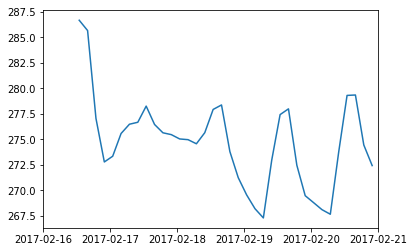

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

yearsFmt = mdates.DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots()

# format the ticks
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(yearsFmt)

date_min, date_max = x[0], x[-1]
datemin = datetime.date(datetime(date_min.year, date_min.month, date_min.day))
datemax = datetime.date(datetime(date_max.year, date_max.month, date_max.day+1))
ax.set_xlim(datemin, datemax)
ax.plot(x, y)